In [1]:
import numpy as np

In [2]:
import pandas as pd

# HR Employee Attrition Analysis

The following code imports the pandas library and loads the employee attrition dataset
from a CSV file called 'Python Final Project.csv' into a DataFrame named employee_attrition.
This DataFrame will be used for further analysis of employee attrition patterns.


In [3]:
import pandas as pd

employee_attrition = pd.read_csv("Python Final Project.csv")
employee_attrition

,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber.1
0,1,2,Female,94,3,2,Sales Executive,4,Single,5993,...,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,...,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2
2,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,...,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4
3,5,4,Female,56,3,1,Research Scientist,3,Married,2909,...,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5
4,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,...,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,...,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061
1466,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,...,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062
1467,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,...,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064
1468,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,...,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065


The following code cell is used to display a concise summary of the DataFrame, 
including the column data types, non-null counts, and memory usage. 

This helps to identify potential missing data and understand the general structure of the dataset.


In [4]:
employee_attrition.info() #checking data info to understand if there is missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1470 non-null   int64 
 1   EnvironmentSatisfaction   1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   HourlyRate                1470 non-null   int64 
 4   JobInvolvement            1470 non-null   int64 
 5   JobLevel                  1470 non-null   int64 
 6   JobRole                   1470 non-null   object
 7   JobSatisfaction           1470 non-null   int64 
 8   MaritalStatus             1470 non-null   object
 9   MonthlyIncome             1470 non-null   int64 
 10  MonthlyRate               1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  Over18                    1470 non-null   object
 13  OverTime                  1470 non-null   object
 14  PercentSalaryHike       

The following code cell displays the number of unique values for each column in the employee_attrition DataFrame.

This helps to understand the categorical variety and potential cardinality of each feature in the dataset.


In [5]:
employee_attrition.nunique()

EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department

### 1st KPI: Attrition Trends and Patterns (by attrition rate):

This KPI measures the overall employee attrition rate in the company.
It calculates the percentage of employees who left ("Attrition = Yes") out of all employees.
By knowing the attrition rate, we get a quick insight into how many employees are leaving the organization.
A high attrition rate can be a warning sign that may indicate possible employee dissatisfaction, issues in work environment, or other organizational problems.

Monitoring this KPI helps the company identify trends and, if needed, take action to improve employee retention.


Number of employees who left:

In [6]:
# Identify overall attrition rates across the company:
# The problem is that ['Attrition'] == 'Yes' returns a boolean Series and is being used incorrectly as a column label.
# To filter rows where Attrition == 'Yes', you should do:
employee_who_left = employee_attrition.loc[employee_attrition['Attrition'] == 'Yes', ('Attrition')].count()
employee_who_left 

np.int64(237)

Number of employees who stayed:

In [7]:
employee_attrition.loc[employee_attrition['Attrition'] == 'No', ['Attrition']].count()

Attrition    1233
dtype: int64

Attrition rate by formula: 

(employee_who_left/total employees)*100

In [35]:
Attrition_Rate = ((employee_who_left / 1470) * 100).round(2)
print("Attrition rate is:", Attrition_Rate, "%")

Attrition rate is: 16.12 %


The pie chart below visualizes the overall employee attrition rate in the company.

This quick graphical summary allows us to understand the proportion of 
employee turnover at a glance, 
highlighting potential retention issues or overall organizational stability.


Pie Chart of Attrition Rate

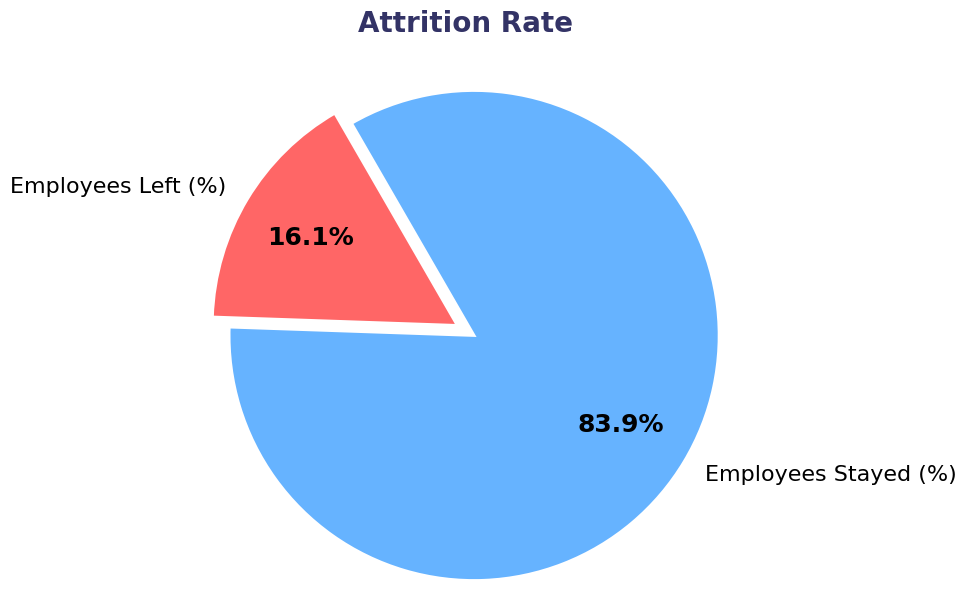

In [8]:
Attrition_Rate = ((employee_who_left / 1470) * 100).round(2)
import matplotlib.pyplot as plt

# יצירת גרף פאי מרהיב המשקף את שיעור העזיבה
sizes = [Attrition_Rate, 100 - Attrition_Rate]
labels = ['עובדים שעזבו (%)', 'עובדים נשארו (%)']
colors = ['#FF6666', '#66B3FF']
explode = (0.08, 0)  # הדגשת נתח העוזבים

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=['Employees Left (%)', 'Employees Stayed (%)'],
    autopct='%1.1f%%',
    startangle=120,
    colors=colors,
    explode=explode,
    pctdistance=0.7,
    textprops={'fontsize':16, 'color':'black'},
    wedgeprops={'edgecolor':'white', 'linewidth':2}
)
# Set the chart title in English instead of Hebrew
plt.title('Employee Attrition Rate in the Organization', fontsize=20, fontweight='bold', color='#333366', pad=25)

# עיצוב כותרת
plt.title('Attrition Rate', fontsize=20, fontweight='bold', color='#333366', pad=25)
plt.setp(autotexts, size=18, fontweight='bold')
plt.setp(texts, size=16)

# הסרת הצירים לעיצוב נקי
ax.axis('equal')

plt.show()

In [ ]:
"""
Insights:
---------
- The employee attrition rate is {0}% out of the total workforce, which highlights a significant turnover that should be addressed.
- The average number of years at the company before departure varies by department.
  Some departments experience shorter employee tenure before employees leave, which may indicate department-specific retention issues.

Based on these findings, here is a recommended future action plan:

Future Plan and Recommendations:
--------------------------------
1. Investigate further the departments where employees tend to leave sooner; understand the challenges and root causes contributing to higher attrition.
2. Enhance exit interviews and stay interviews to uncover underlying reasons for departures and potential dissatisfaction.
3. Monitor and analyze additional factors, such as promotion rates, satisfaction levels, and workload balance, particularly in departments with greater turnover.
4. Consider implementing targeted retention initiatives or career development programs in higher-risk departments.
5. Continuously review and update human resources practices and policies to support employee satisfaction, engagement, and retention.
""".format(Attrition_Rate)



Years as an Employee at the Company:


In [36]:
# The avg time where an employee left the comapny in each department:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('Department')['YearsAtCompany'].mean().round(1))

Department
Human Resources           4.2
Research & Development    5.0
Sales                     5.5
Name: YearsAtCompany, dtype: float64

The bar chart below shows the average number of years that employees who left the company had spent at the company, broken down by department.


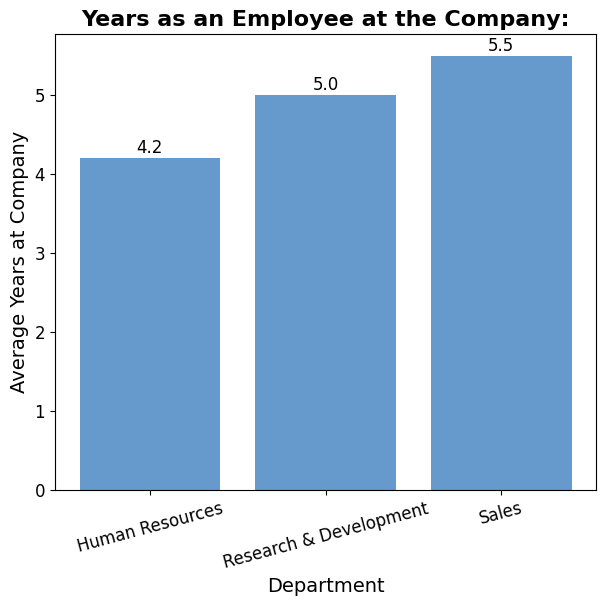

In [55]:
# Bar chart of average years at company by department for employees who left
import matplotlib.pyplot as plt

avg_years_left = (employee_attrition[employee_attrition['Attrition'] == 'Yes']
                  .groupby('Department')['YearsAtCompany']
                  .mean()
                  .round(1))

fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(avg_years_left.index, avg_years_left.values, color='#6699CC')  # single tone color

ax.set_title("Years as an Employee at the Company:", fontsize=16, fontweight='bold')
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Average Years at Company', fontsize=14)
ax.bar_label(bars, fmt='%.1f', padding=1, fontsize=12)
plt.xticks(rotation=15, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=0.5)
plt.show()



Job Satisfaction for Employees who Left:

In [37]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('Department')['JobSatisfaction'].mean().round(1))

Department
Human Resources           2.2
Research & Development    2.5
Sales                     2.5
Name: JobSatisfaction, dtype: float64

Percent Salary Hike for Employees who left:

In [38]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('Department')['PercentSalaryHike'].mean().round(1))

Department
Human Resources           13.8
Research & Development    15.3
Sales                     15.0
Name: PercentSalaryHike, dtype: float64

In [39]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('JobRole')['YearsAtCompany'].mean().round(1))

JobRole
Healthcare Representative    10.9
Human Resources               4.2
Laboratory Technician         3.2
Manager                      15.6
Manufacturing Director        8.7
Research Director            26.5
Research Scientist            4.3
Sales Executive               6.7
Sales Representative          2.1
Name: YearsAtCompany, dtype: float64

In [40]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('JobRole')['YearsAtCompany'].mean().round(1))

JobRole
Healthcare Representative    10.9
Human Resources               4.2
Laboratory Technician         3.2
Manager                      15.6
Manufacturing Director        8.7
Research Director            26.5
Research Scientist            4.3
Sales Executive               6.7
Sales Representative          2.1
Name: YearsAtCompany, dtype: float64

### 2nd KPI: Compensation and Benefits Analysis

In [15]:
#average monthly income by department of employees who have left the company:
employee_attrition[employee_attrition['Attrition'] == 'Yes'].groupby('Department')['MonthlyIncome'].mean().round(1)

Department
Human Resources           3715.8
Research & Development    4108.1
Sales                     5908.5
Name: MonthlyIncome, dtype: float64

In [16]:
#average monthly income by department of employees who have stayed in the company:
employee_attrition[employee_attrition['Attrition'] == 'No'].groupby('Department')['MonthlyIncome'].mean().round(1)

Department
Human Resources           7346.0
Research & Development    6630.3
Sales                     7232.2
Name: MonthlyIncome, dtype: float64

In [17]:
#Analyze the relationship between salary levels and attrition rates:
# Calculate the correlation between JobLevel and Attrition (convert Attrition to numeric for correlation)
correlation = (employee_attrition['JobLevel']
.corr(employee_attrition['Attrition']
.apply(lambda x: 1 if x == 'Yes' else 0)).round(1))
print("Correlation between JobLevel and Attrition:", correlation)

#the correlation is negative and weak

Correlation between JobLevel and Attrition: -0.2


In [18]:
# Analyze the impact of stock options on attrition:
correlation_2 = (employee_attrition['StockOptionLevel']
.corr(employee_attrition['Attrition']
.apply(lambda x: 1 if x == 'Yes' else 0)).round(1))
print("Correlation between StockOptionLevel and Attrition:", correlation_2)

Correlation between StockOptionLevel and Attrition: -0.1


In [19]:
# Analyze the impact of salary hikes on attrition:
correlation_3 = (employee_attrition['PercentSalaryHike']
.corr(employee_attrition['Attrition']
.apply(lambda x: 1 if x == 'Yes' else 0)).round(1))
print("Correlation between PercentSalaryHike and Attrition:", correlation_3)

Correlation between PercentSalaryHike and Attrition: -0.0


### 3rd KPI: Work-Life Balance and Satisfaction:

In [20]:
# Display the attrition percentage for each level of WorkLifeBalance
# This Series shows, for each unique value of WorkLifeBalance, the percentage of employees who have left the company ("Attrition == 'Yes'")
# The data is grouped by WorkLifeBalance and the percentage is already calculated in the previous code cell

attrition_wlb = (
   employee_attrition.groupby(['WorkLifeBalance'])[['Attrition']]
    .apply(lambda x: (x.eq('Yes').sum() / len(x)) * 100)
    .round(2)
)
attrition_wlb

,Attrition
WorkLifeBalance,
1,31.25
2,16.86
3,14.22
4,17.65


In [21]:
#total employees at each score:
employee_attrition.groupby('WorkLifeBalance')[['Attrition']].count()

,Attrition
WorkLifeBalance,
1,80
2,344
3,893
4,153


In [22]:
#employess who left at a given work-life balance score:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('WorkLifeBalance')[['Attrition']].count())

,Attrition
WorkLifeBalance,
1,25
2,58
3,127
4,27


In [23]:
#attrition rate by work-life balance:
((employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['WorkLifeBalance'])['Attrition']
.count())/(employee_attrition.groupby(['WorkLifeBalance'])['Attrition']
.count())*100).round(2)

# The previous calculations show the count of total employees (cell above),
# the number of employees who left ('Yes' for Attrition), and the percentage of attrition for each WorkLifeBalance score.
# This helps us see whether better work-life balance correlates with lower attrition rates.
# Generally, we observe that employees with higher WorkLifeBalance scores tend to have lower attrition percentages.

WorkLifeBalance
1    31.25
2    16.86
3    14.22
4    17.65
Name: Attrition, dtype: float64

In [24]:
# employess who stayed at a given work-life balance score:
(employee_attrition[employee_attrition['Attrition'] == 'No']
.groupby('WorkLifeBalance')[['Attrition']].count())

,Attrition
WorkLifeBalance,
1,55
2,286
3,766
4,126


In [25]:
# evaluation job satisfaction and work-life balance ratings for employees who left vs. those who stayed
employee_attrition.groupby('Attrition')[['JobSatisfaction','WorkLifeBalance']].mean().round(2)

,JobSatisfaction,WorkLifeBalance
Attrition,,
No,2.78,2.78
Yes,2.47,2.66


In [26]:
# Assess environmental and relationship satisfaction to understand their impact on retention
employee_attrition.groupby('Attrition')[['EnvironmentSatisfaction','RelationshipSatisfaction']].mean().round(2)

,EnvironmentSatisfaction,RelationshipSatisfaction
Attrition,,
No,2.77,2.73
Yes,2.46,2.60


In [27]:
# Assess environmental and relationship satisfaction to understand their impact on retention
employee_attrition.groupby('Attrition')[['EnvironmentSatisfaction','RelationshipSatisfaction']].agg(['mean', 'median', 'std']).round(2)

EnvironmentSatisfaction              RelationshipSatisfaction  \
                             mean median   std                     mean   
Attrition                                                                 
No                           2.77    3.0  1.07                     2.73   
Yes                          2.46    3.0  1.17                     2.60   

                        
          median   std  
Attrition               
No           3.0  1.07  
Yes          3.0  1.13

In [28]:
#attrition rate by EnvironmentSatisfaction:
((employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['EnvironmentSatisfaction'])['Attrition']
.count())/(employee_attrition.groupby(['EnvironmentSatisfaction'])['Attrition']
.count())*100).round(2)

EnvironmentSatisfaction
1    25.35
2    14.98
3    13.69
4    13.45
Name: Attrition, dtype: float64

In [29]:
#attrition rate by RelationshipSatisfaction:
((employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['RelationshipSatisfaction'])['Attrition']
.count())/(employee_attrition.groupby(['RelationshipSatisfaction'])['Attrition']
.count())*100).round(2)

RelationshipSatisfaction
1    20.65
2    14.85
3    15.47
4    14.81
Name: Attrition, dtype: float64

In [30]:
# employess who stayed at a given EnvironmentSatisfaction score:
(employee_attrition[employee_attrition['Attrition'] == 'No']
.groupby(['EnvironmentSatisfaction'])[['Attrition']]
.count())

,Attrition
EnvironmentSatisfaction,
1,212
2,244
3,391
4,386


In [31]:
# total employees at each score:
(employee_attrition.groupby(['EnvironmentSatisfaction'])[['Attrition']]
.count())

,Attrition
EnvironmentSatisfaction,
1,284
2,287
3,453
4,446


In [32]:
# employess who left at a given EnvironmentSatisfaction score:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['EnvironmentSatisfaction'])[['Attrition']]
.count())

,Attrition
EnvironmentSatisfaction,
1,72
2,43
3,62
4,60


## 4. Career Growth and Job Stability

In [33]:
employee_attrition.groupby('Attrition')['YearsSinceLastPromotion'].sum()

Attrition
No     2755
Yes     461
Name: YearsSinceLastPromotion, dtype: int64

In [34]:
employee_attrition.groupby('Attrition')['YearsSinceLastPromotion'].sum()

Attrition
No     2755
Yes     461
Name: YearsSinceLastPromotion, dtype: int64